Lab-10: Write a program to estimate pitch of a speech signal.

Pitch Period (To): 0.004081632653061225
Pitch Frequency (Fo): 244.99999999999997


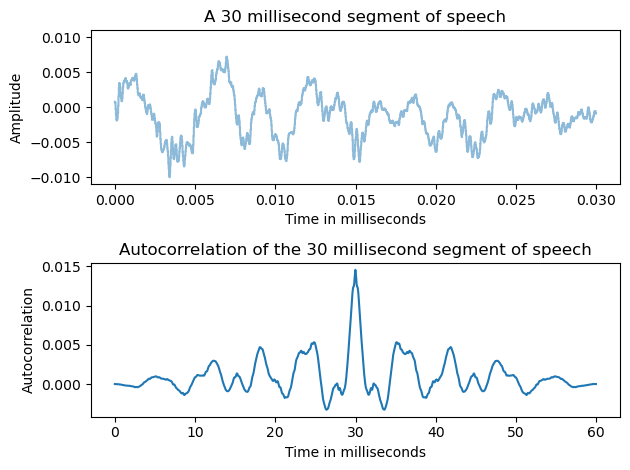

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
# Read the speech segment from the WAV file using Librosa
# y, Fs = librosa.load(r"C:\Users\Win-10\OneDrive\Desktop\Lab_3.2\Recording.wav", sr=None)
y, Fs = librosa.load(r"harvard.wav", sr=None)
# Cut a portion of the speech signal (for example, for 30 ms)
start_time = 4.515
end_time = 4.545
y = y[int(start_time * Fs):int(end_time * Fs)]
# Compute autocorrelation
autocorrelation = np.correlate(y, y, mode='full')
# Time axis for autocorrelation plot (in milliseconds)
kk = np.arange(0, len(autocorrelation)) / Fs * 1000
# Plot original signal
plt.subplot(2, 1, 1)
# plt.plot(np.arange(len(y)) / Fs * 1000, y)
librosa.display.waveshow(y, sr=Fs, alpha=0.5)
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('A 30 millisecond segment of speech')
# Plot autocorrelation
plt.subplot(2, 1, 2)
plt.plot(kk, autocorrelation)
plt.xlabel('Time in milliseconds')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the 30 millisecond segment of speech')
# Extract relevant part of autocorrelation (21 to 160)
auto = autocorrelation[20:160]
# Find the maximum value and corresponding sample number
max_idx = np.argmax(auto)
sample_no = max_idx + 21 # Adjust for the indexing
pitch_period_To = (20 + sample_no) * (1 / Fs)
pitch_freq_Fo = 1 / pitch_period_To
print("Pitch Period (To):", pitch_period_To)
print("Pitch Frequency (Fo):", pitch_freq_Fo)
plt.tight_layout()
plt.show()